<a href="https://colab.research.google.com/github/pranavrao87/Machine-Learning/blob/main/Classification%20Models/02_neural_network_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to neural network classification w/ tensorflow

Learning how to write neural networks for classification problems
- Classification problem: when you to try to classify something as one thing or another
    - Binary classification
    - Multiclass classification
    - Multilabel classification


# Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Visualizing data

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


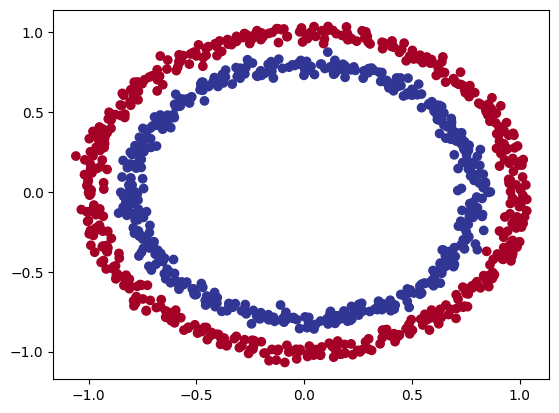

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# number of samples
len(X), len(y)

(1000, 1000)

In [ ]:
# View 1st example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1. Create or import model
2. Compile model
3. Fit model
4. Evaluate model


In [ ]:
import tensorflow as tf

In [ ]:
# Set random seet
tf.random.set_seed(42)

# 1. Create model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 5.6365 - accuracy: 0.4830
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 4.7084 - accuracy: 0.4910
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 3.1166 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7528 - accuracy: 0.4990
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7109 - accuracy: 0.4960


In [ ]:
# Train model for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

50% accuracy on a binary classification model indicates that model is just guessing...

In [ ]:
# Add extra layer
tf.random.set_seed(42)

# 1. Create model w/ 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Train model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

## Improving Model

1. Create model - add more layers or increase num of hidden units w/in layer
2. Compile model - choose diff optimization function (Adam instead of SGD)
3. Fit model - train for more epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model w/ 3 layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add layers w/ 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5050


[0.697955310344696, 0.5049999952316284]

Create function to visualize function predictions: 'plot_decision_boundary()'
- Take in trained model, features (X) labels (y)
- Create a meshgrid of diff X vals
- Make predictions across meshgrid
- Plot predictions as well as trends line b/w zones where each unique class falls

In [ ]:
import numpy as np


In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots decision boundary created by model predicting on X.
      1. CS231n - https://cs231n.github.io/neural-networks-case-study/
      2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define axis boundaries of plot and create meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (going to predict on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1:
    print("Multiclass classification")
    # Reshape predictions to get ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decisions
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
Binary classification


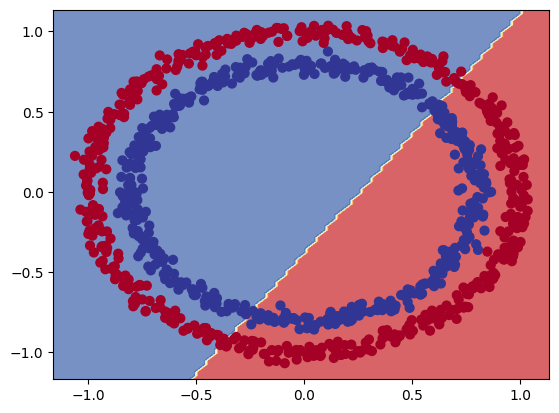

In [ ]:
# Check predictions model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# Try model on regression data

tf.random.set_seed(42)

# Regression data
X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5) # y = X + 100
X_reg, y_reg

# Split data into training and test sets
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

# Fit model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

model_3 developed for binary classification problem which uses loss=BinaryCrossentropy, but regression problem requires a loss function usually of mae or mse

In [ ]:
# rand seed
tf.random.set_seed(42)

# 1. Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model w/ regression specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 450.6210 - mae: 450.6210
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 335.0762 - mae: 335.0762
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 223.1564 - mae: 223.1564
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 106.1089 - mae: 106.1089
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 54.7402 - mae: 54.7402
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 84.7607 - mae: 84.7607
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 65.2937 - mae: 65.2937
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.4050 - mae: 43.4050
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 48.0601 - mae: 48.0601
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 41.5114 - mae: 41.5114
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 6ms/step


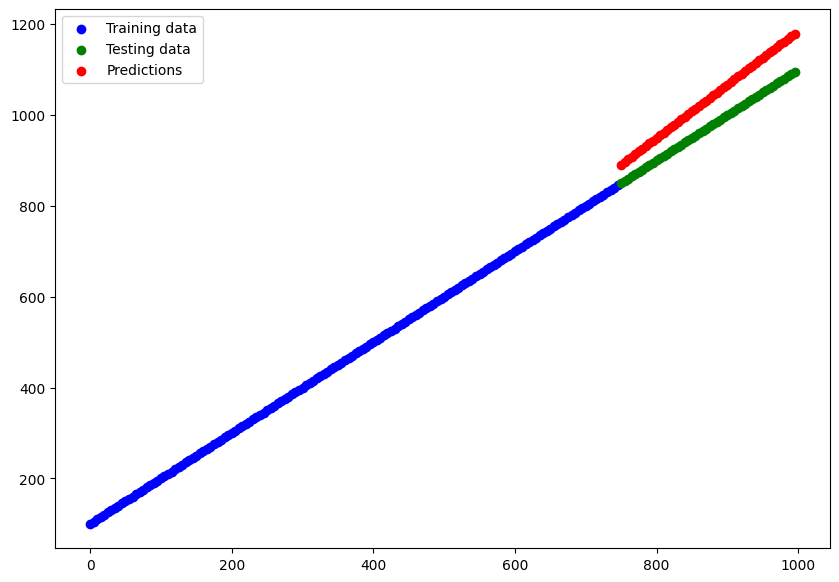

In [ ]:
# Make predictions w/ trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot model's predictions against data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## Non-linearity

In [ ]:
# Rebuild this model: https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=1&seed=0.26333&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
# Rand seed
tf.random.set_seed(42)

# 1. Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2727 - accuracy: 0.4100
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1750 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1386 - accuracy: 0.4330
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0473 - accuracy: 0.4460
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9954 - accuracy: 0.4510
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9194 - accuracy: 0.4550
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8166 - accuracy: 0.4550
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7603 - accuracy: 0.4590
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6563 - accuracy: 0.4630
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6267 - accuracy: 0.4710
Epoch 11/

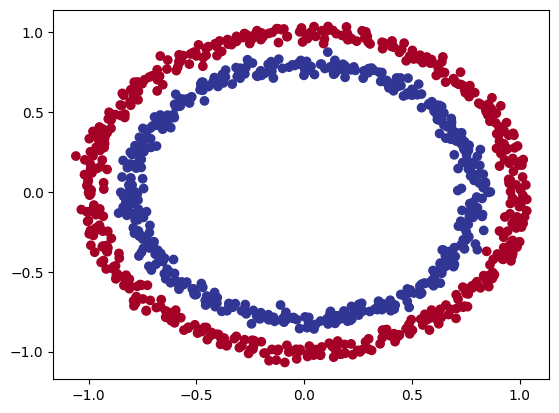

In [ ]:
# Visualize data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Binary classification


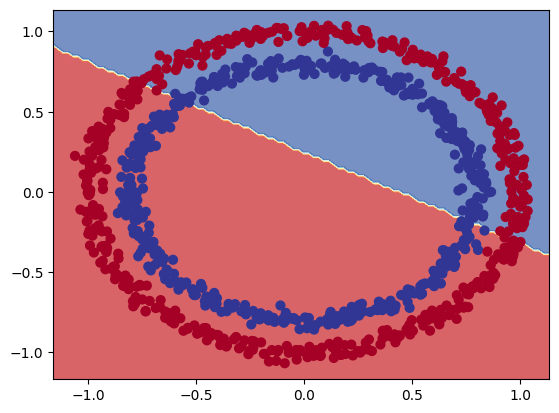

In [ ]:
# Decision boundary for latest model
plot_decision_boundary(model_4, X, y)

Use non-linear activation function

In [ ]:
# Set rand seed
tf.random.set_seed(42)

# 1. Create model w/ non-linear activation function (anything but linear activation)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3655 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1797 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0332 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9215 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8239 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7503 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7175 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5836 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4897 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4442 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 0s 1ms/step
Binary classification


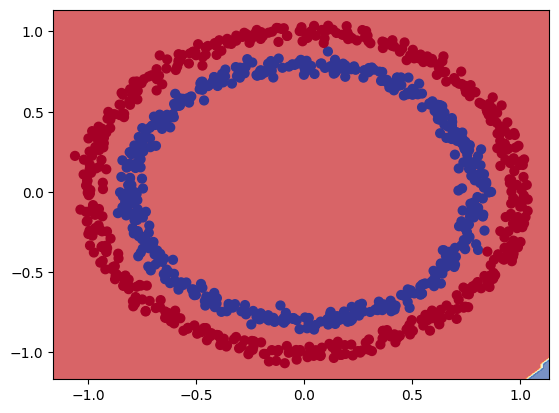

In [ ]:
plot_decision_boundary(model_5, X, y)

In [ ]:
# Set rand seed
tf.random.set_seed(42)

# https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=5,3,1&seed=0.26333&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
# 1. Create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. Fit model
history = model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.7573 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7368 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7242 - accuracy: 0.4640
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7165 - accuracy: 0.4100
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7116 - accuracy: 0.4690
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7085 - accuracy: 0.4310
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.4510
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7041 - accuracy: 0.4630
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.4620
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.4640
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Binary classification


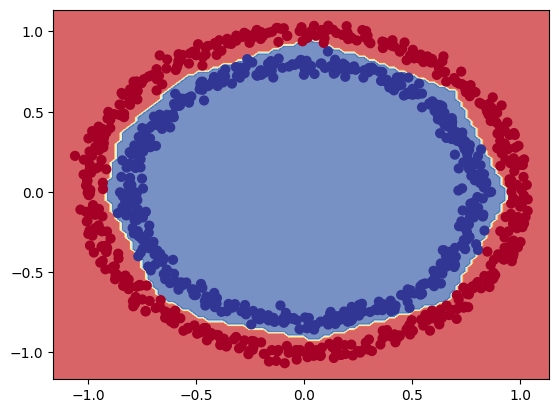

In [ ]:
plot_decision_boundary(model_6, X, y)

In [ ]:
# https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.26333&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

# Set rand seed
tf.random.set_seed(42)

# 1. Create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.4946 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1301 - accuracy: 0.4430
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0162 - accuracy: 0.4250
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9527 - accuracy: 0.4410
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9051 - accuracy: 0.4550
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8664 - accuracy: 0.4420
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8350 - accuracy: 0.4500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8099 - accuracy: 0.4350
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7897 - accuracy: 0.4510
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7732 - accuracy: 0.4150
Epoch 11/

In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.6040


[0.62502121925354, 0.6039999723434448]

313/313 [==============================] - 0s 1ms/step
Binary classification


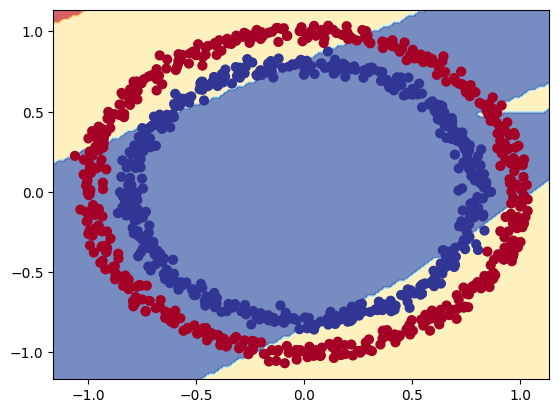

In [ ]:
plot_decision_boundary(model_7, X, y)

In [ ]:
# Output layer has diff activation function

# Set rand seed
tf.random.set_seed(42)

# 1. Create model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5120
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5100
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5080
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5180
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5200
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5110
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5570
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5740
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5800
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5370
Epoch 11/

In [ ]:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9900


[0.23045819997787476, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
Binary classification


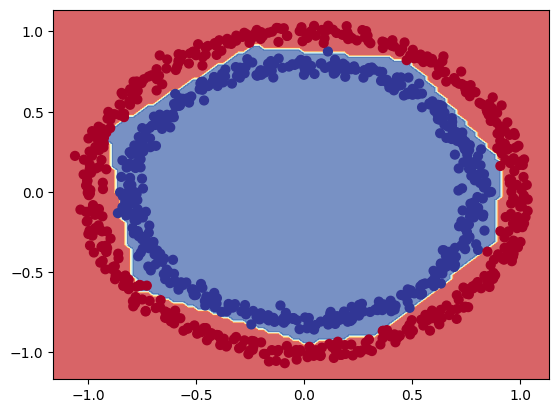

In [ ]:
plot_decision_boundary(model_8, X, y)

In [ ]:
# Creating a tensor to visualize non-linear and linear activation functions
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

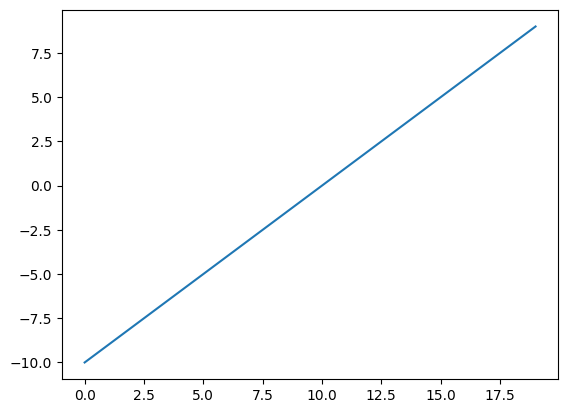

In [ ]:
# Visualize tensor
plt.plot(A)

In [ ]:
# Replicating sigmoid function: sigmoid(x) = 1 / (1 + e^(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x)) # where tf.exp = Computes exponential of x element-wise y = e^x.

# Use sigmoid on tensor A
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

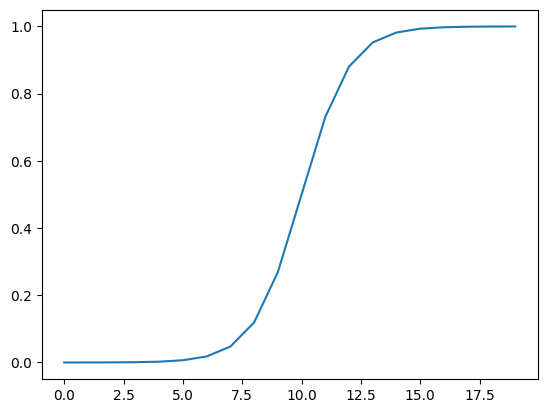

In [ ]:
# Plot tensor
plt.plot(sigmoid(A))

In [ ]:
# Relu function
def relu(x):
  return tf.maximum(0, x)

# Call relu on tensor A
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

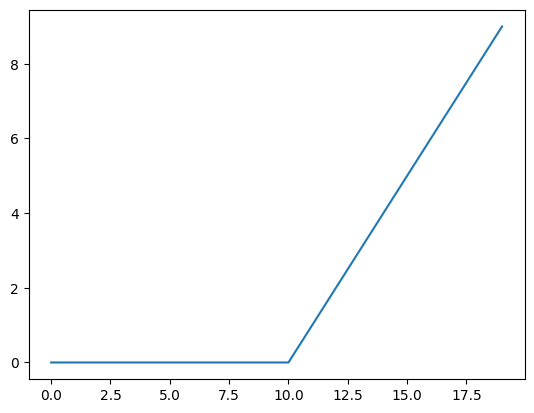

In [ ]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

In [ ]:
# Linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

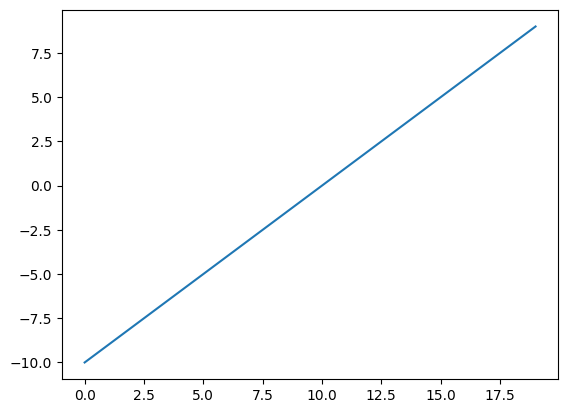

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Check if it equals original tensor
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving classification model

- Create a training and testing set

In [ ]:
# Check length of examples of dataset
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Recreate model to fit on training data and evaluate on testing data

# Set rand seed
tf.random.set_seed(42)

# 1. Create model (same as model 8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. Fit model
history = model_9.fit(X_train, y_train, epochs=75)

Epoch 1/75
25/25 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5125
Epoch 2/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5125
Epoch 3/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5188
Epoch 4/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5125
Epoch 5/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5125
Epoch 6/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5138
Epoch 7/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5150
Epoch 8/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5200
Epoch 9/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5288
Epoch 10/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5250
Epoch 11/75
25/25 [